# Introduction

- Insurance cost prediction is a regression problem where we will be predicting the insurance charges for customer based on past data.
- Dataset originally belongs to US which is available on kaggle [here](https://www.kaggle.com/datasets/mirichoi0218/insurance).
- This will help insurance company to predict insurance charges of customer with minimum efforts and less cost.
- It will also save a lot of time as now employee don’t have to look in past data or don’t need experience at all to do prediction.


In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

### STEP-1 Read Data

In [11]:
# Decraling Path to dataset
path = os.path.join("../data", "insurance.csv")

In [12]:
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### STEP-2 Data Preprocessing

In [13]:
df.shape

(1338, 7)

### Basic Infomation of data

In [14]:
print(df.columns)
print(20*'-')
print(df.dtypes)
print(20*'-')
print(df.info())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
--------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### Parameter of data

In [15]:
print("1. Minimum age if primary beneficiary is {}".format(df['age'].min()))
print("2. Maximum age of primary beneficiary is {}".format(df['age'].max()))
print("3. Maximun no of dependents are {}".format(df['children'].max()))
normal_range_beneficiary_per = round((len(df[df['bmi'].between(18.5,24.9)])/1338)*100)
print("4. Ideal bmi range is between 18.5 to 24.9, percentage of beneficiaries who's bmi is ideal {}%".format(normal_range_beneficiary_per))
print("5. Percentage of beneficiaries who are having bmi above 24.9 are {}".format((len(df[df['bmi']>24.9])/1338)*100))
print("6. Average insurance charges billed by the insurance company is {}".format(df['charges'].mean()))
print("7. The beneficiaries residencil area in the US are: {}".format(",".join(list(df['region'].unique()))))

1. Minimum age if primary beneficiary is 18
2. Maximum age of primary beneficiary is 64
3. Maximun no of dependents are 5
4. Ideal bmi range is between 18.5 to 24.9, percentage of beneficiaries who's bmi is ideal 17%
5. Percentage of beneficiaries who are having bmi above 24.9 are 81.91330343796712
6. Average insurance charges billed by the insurance company is 13270.422265141257
7. The beneficiaries residencil area in the US are: southwest,southeast,northwest,northeast


### Checking for missing values

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No missing values to be found in data.

### Exploratory Data Analysis

Checking for outliers --

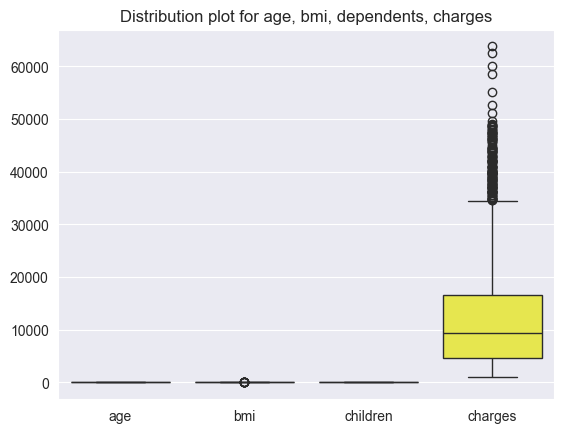

In [17]:
sns.boxplot(data=df.loc[:, ['age', 'bmi', 'children', 'charges' ]],palette='hot')
plt.title("Distribution plot for age, bmi, dependents, charges");

- We have outliers in the charges column, which is also our target column and we will be handling outliers with log transformation to make all the charges in one scale, as the unit can affect the prediction.

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

1.5158796580240388


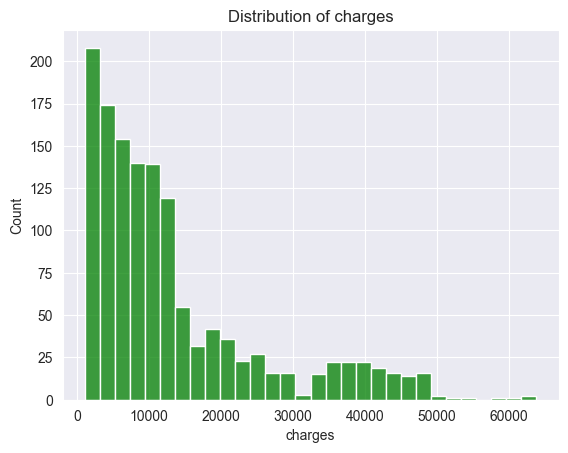

In [19]:
sns.histplot(data=df['charges'], color='g')
plt.title("Distribution of charges")
print(df['charges'].skew())
plt.show()

- From this charges distibution chart we can see that maximum no of the beneficiaries are charged insurance cost less than 20000.

smoker
no     1064
yes     274
Name: sex, dtype: int64


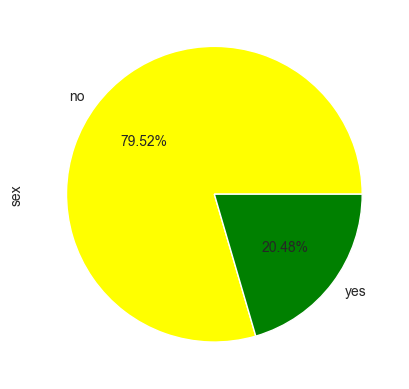

In [20]:
df.groupby('smoker')['sex'].count().plot(kind='pie', colors=['yellow', 'green'], autopct='%.2f%%')
print(df.groupby('smoker')['sex'].count())

- From above chart we can analyse that their are only 20% of beneficiaries who are smoker category and rest 80% belong to non-smoker category.
- Which raises the assumption of, that very less beneficiaries of smoker category are intrested in the insurance policies offered by this company.

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64


Text(0.5, 1.0, 'Male vs female smoker count')

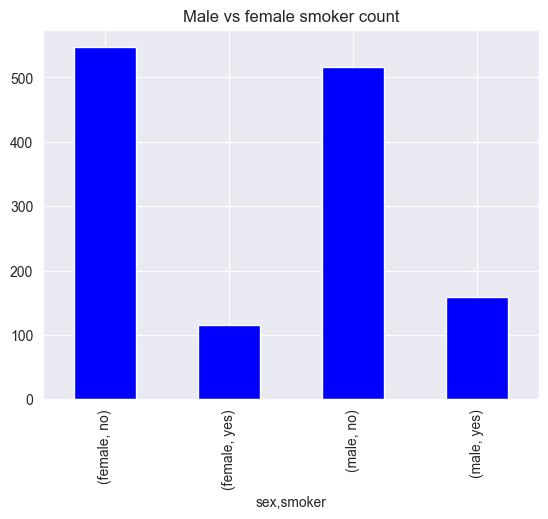

In [21]:
print(df.groupby(['sex', 'smoker']).size())
df.groupby(['sex', 'smoker']).size().plot(kind='bar', color='b')
plt.title('Male vs female smoker count')

- From above analysis we can see that male smoker beneficiaries are slightly higher in count then the female, female are slightly more in the non-msoker category.

Text(0.5, 1.0, 'Age vs charges')

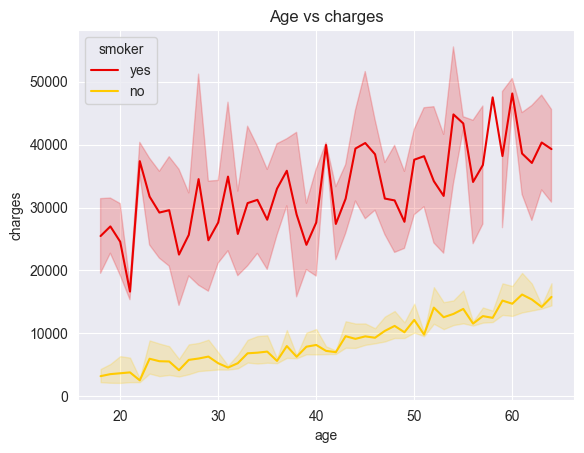

In [22]:
sns.lineplot(x='age', y='charges', data=df, hue='smoker', estimator='mean', palette='hot')
plt.title("Age vs charges")

Text(0.5, 1.0, 'Age vs charges')

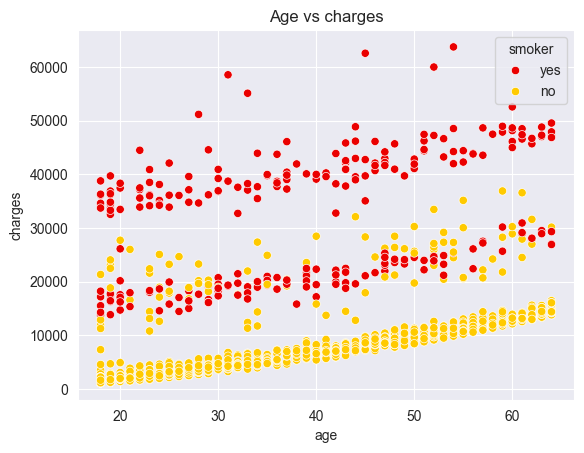

In [23]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='hot')
plt.title("Age vs charges")

- From the above plots we can analyse that the average charges for smoker are sigificanly higher than that of a non-smoker beneficiary, irrespective of their age.
- In the scatter plot we can see that for most of the smoker beneficiaries the charges start where the maximum charges of non-smoker beneficiaries end.

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


Text(0.5, 1.0, 'No of Dependents')

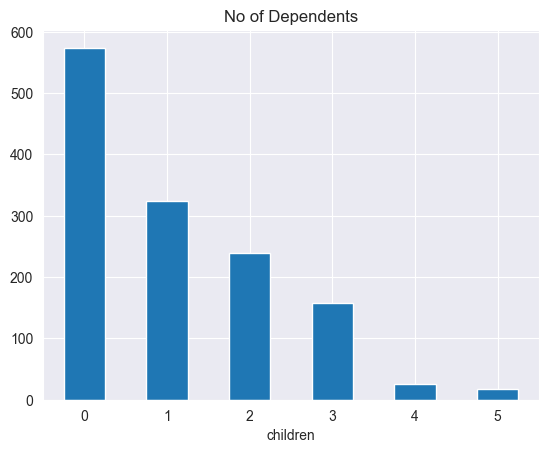

In [24]:
print(df['children'].value_counts())
df['children'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("No of Dependents")

- From the above analysis we can see that maximum no of the beneficiaries are not having dependents or at maximum 1 to 2 dependents.

Text(0.5, 1.0, 'Dependents vs Charges')

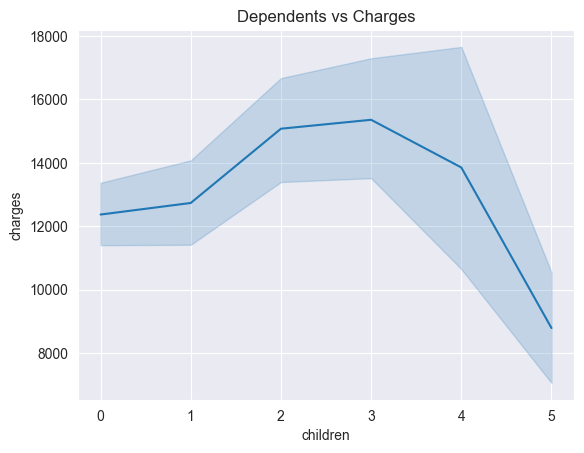

In [25]:
sns.lineplot(x='children', y='charges', data=df)
plt.title('Dependents vs Charges')

- Form the above line chart we can see that as the dependents increases the charges also increase till 4 dependents which is normal.
- But we can also see that beneficiaries with 5 dependents are having the least charged of all.
- Reason could be that the beneficiaries with more then 4 dependents would be opting plan with lower coverage or cost.

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Text(0.5, 1.0, 'Residensil area of beneficiary')

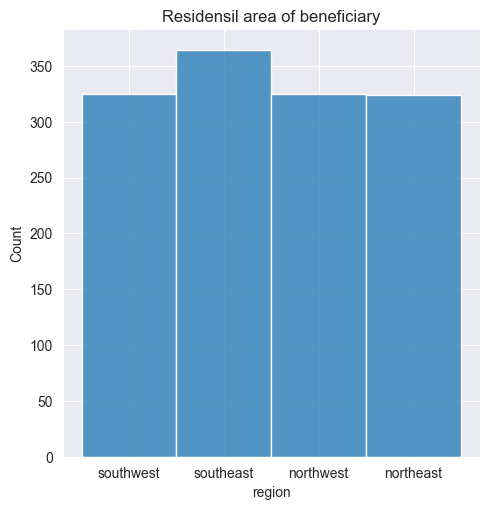

In [26]:
print(df['region'].value_counts())
sns.displot(df['region'])
plt.title('Residensil area of beneficiary')

- Southeast region is slightly more populated with beneficiaries.

0.2840471105987448
30.66339686098655


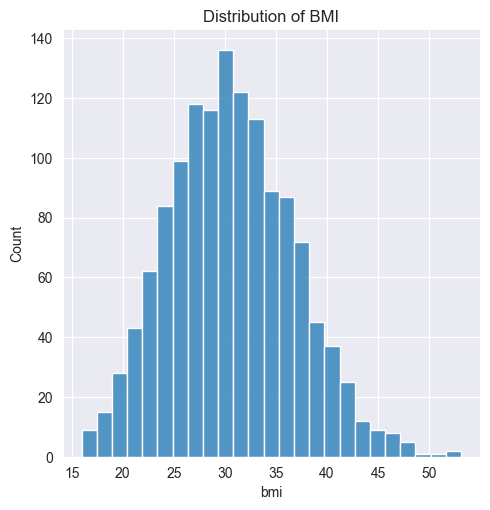

In [27]:
sns.displot(df['bmi'])
plt.title('Distribution of BMI')
print(df['bmi'].skew())
print(df['bmi'].mean())

- In the distribution chart we can see that the bmi is normally distirbuted but the mean of the bmi is above the ideal of 18.5 to 24.9, which is that most of the beneficiaries are having bmi above the ideal range and their is a higher chance that company will find customer's with more then ideal bmi offten and should make the insurance plans with bmi in consideration. 

Text(0.5, 1.0, 'BMI vs Charges')

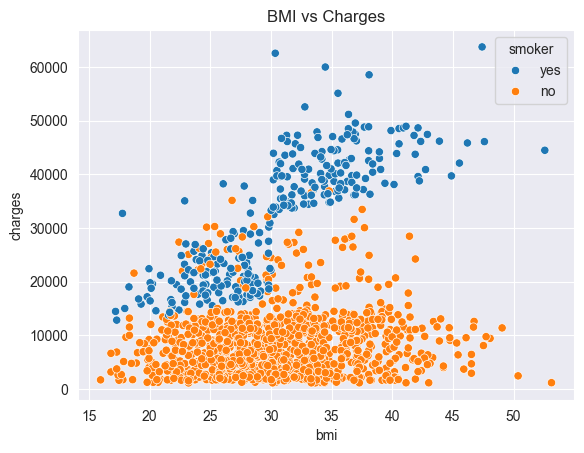

In [28]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('BMI vs Charges')

- From above scatter plot we can analyse that if bmi is above ideal range and beneficiary is not smoker then charges might increase, but if the beneficiary is smoker and bmi is above ideal range then charges are certain to increase.

In [29]:
df_corr = df[df.select_dtypes(exclude='object').columns].corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Metrix')

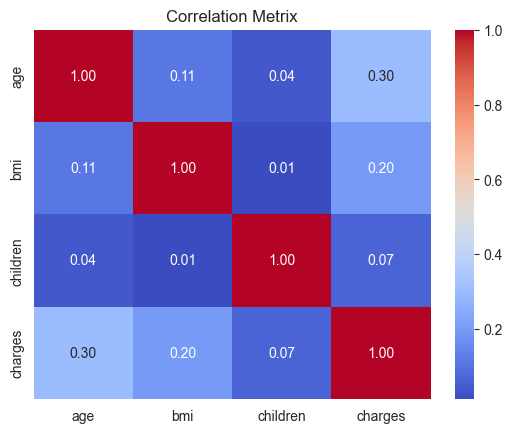

In [30]:
sns.heatmap(data=df_corr, cmap='coolwarm', fmt='.2f', annot=True)
plt.title('Correlation Metrix')

- From this correlation martix we can see that there is no correlation among the x variables and also the correlation with target variable is little  to no.

### Conclusion
- From above analysis we found following insights:
    - The charges for smoker category beneficiary are significantly higher as compared to non-smoker beneficiary.
    - The charges might increase for beneficiary with bmi higher then ideal and is from non-smoker category but for beneficiary from smoker category and bmi higher then ideal the charges are certain to increase.
    - Maximum number of benficiaries are not having dependents and also the charges tend to increase as the number of dependents increase, but for beneficiaries with 5 dependents the charges are least even lower than the charges of benficiaries with no dependents which is not normal assumption being that the these beneficairies are buying plan's with lower coverage to reduce the cost.
    - Beneficiaries are slightly more populated in the southeast region.

### Suggestion

- Company should either decrease the cost of their insurance plans or they should intorduce new plans for the smoker category as their are very less beneficiaries of smoker category and also the charges are significantly higher than the non-smoker category.
- Company should also introduce new plan's for beneficiaries with 5 or more dependents as these people tend to buy plans with lower coverage to reduce the cost of insurance.